<a href="https://colab.research.google.com/github/shardul28/political-stance-detection/blob/Mscproject/proj240322.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding
from tensorflow.keras.optimizers import Adam



In [4]:
cd /content/drive/MyDrive/republic ndtv data/testing_data/

/content/drive/MyDrive/republic ndtv data/testing_data


In [5]:
df=pd.read_csv('/content/drive/MyDrive/republic ndtv data/testing_data/ndtv - Sheet1.csv')

In [6]:
df

,Unnamed: 0,time,text,url,retweet_count,favorite_count,left 0 right 1,title,content
0,0,Mon Oct 11 07:47:24 +0000 2021,"Army Officer, 4 Others Killed In Encounter In ...",https://www.ndtv.com/india-news/army-officer-4...,9,63,NaN,"Army Officer, 4 Personnel Killed In Encounter ...",an army officer and four other personnel were ...
1,1,Mon Oct 11 07:38:49 +0000 2021,"#AryanKhan Case: No Bail For Him Today, Next H...",https://ndtv.com/india-news/mumbai-drug-bust-c...,5,44,NaN,"Aryan Khan Case: No Bail For Him Today, Next H...",aryan khan did not get bail today for the thir...
2,2,Mon Oct 11 07:31:00 +0000 2021,RT @ndtvfeed: Ex-National Conference Leaders D...,https://www.ndtv.com/india-news/after-resignin...,2,0,1.0,"Ex-National Conference Leaders Devender Rana, ...",a day after resigning from the national confer...
3,3,Mon Oct 11 07:30:21 +0000 2021,"RT @ndtvfeed: US Has Lost AI Battle To China, ...",https://www.ndtv.com/world-news/us-has-lost-ar...,5,0,0.0,"US Has Lost AI Battle To China, Pentagon's Ex-...",china has won the artificial intelligence batt...
4,4,Mon Oct 11 07:20:48 +0000 2021,RT @ndtvfeed: A Look At Inspiring Messages On ...,https://www.ndtv.com/india-news/on-internation...,3,0,NaN,International Day Of The Girl Child 2021: Lead...,various world leaders and un agencies posted w...
...,...,...,...,...,...,...,...,...,...
1366,1366,Fri Oct 01 02:24:33 +0000 2021,"RT @ndtvfeed: On North Korea, Joe Biden's ""No ...",https://www.ndtv.com/world-news/north-korea-us...,2,0,NaN,"On North Korea, Joe Biden's ""No Urgency"" Polic...","during their only meeting, barack obama warned..."
1367,1367,Fri Oct 01 02:12:57 +0000 2021,"RT @ndtvfeed: ""Very Honest"" About Concerns On ...",https://www.ndtv.com/world-news/us-very-honest...,4,0,NaN,"""Been Very Honest About Concerns With Pak"" Ove...",the us has been very honest about its concerns...
1368,1368,Fri Oct 01 02:12:52 +0000 2021,"RT @ndtvfeed: Iran To Set Date In ""Weeks"" For ...",https://www.ndtv.com/world-news/iran-nuclear-t...,3,0,NaN,"Iran To Set Date In ""Weeks"" To Return To Nucle...",iran's new government will in the next few wee...
1369,1369,Fri Oct 01 02:12:46 +0000 2021,"RT @ndtvfeed: European Union, Australia Trade ...",https://www.ndtv.com/world-news/submarine-row-...,3,0,NaN,"European Union, Australia Trade Talks Postpone...",a long-planned round of australia-eu free trad...


In [7]:
##CHECKING NULL VALUES
print(df.isna().sum())


Unnamed: 0           0
time                 0
text                 0
url                  0
retweet_count        0
favorite_count       0
left 0 right 1    1042
title                0
content              0
dtype: int64


In [8]:
df.columns

Index(['Unnamed: 0', 'time', 'text', 'url', 'retweet_count', 'favorite_count',
       'left 0 right 1', 'title', 'content'],
      dtype='object')

In [9]:
##bias=left 0 right 1 unbiased 3

In [10]:
df.rename(columns = {'left 0 right 1':'bias'}, inplace = True)

In [11]:
df=df.fillna({'bias':3})

In [12]:
df['bias']=df['bias'].astype(int)

In [13]:
df.columns

Index(['Unnamed: 0', 'time', 'text', 'url', 'retweet_count', 'favorite_count',
       'bias', 'title', 'content'],
      dtype='object')

In [14]:
##REMOVING 'Unnamed: 0', 'time', 'url' 
df=df[['text','retweet_count', 'favorite_count',
       'bias', 'title', 'content']]

In [15]:
df

,text,retweet_count,favorite_count,bias,title,content
0,"Army Officer, 4 Others Killed In Encounter In ...",9,63,3,"Army Officer, 4 Personnel Killed In Encounter ...",an army officer and four other personnel were ...
1,"#AryanKhan Case: No Bail For Him Today, Next H...",5,44,3,"Aryan Khan Case: No Bail For Him Today, Next H...",aryan khan did not get bail today for the thir...
2,RT @ndtvfeed: Ex-National Conference Leaders D...,2,0,1,"Ex-National Conference Leaders Devender Rana, ...",a day after resigning from the national confer...
3,"RT @ndtvfeed: US Has Lost AI Battle To China, ...",5,0,0,"US Has Lost AI Battle To China, Pentagon's Ex-...",china has won the artificial intelligence batt...
4,RT @ndtvfeed: A Look At Inspiring Messages On ...,3,0,3,International Day Of The Girl Child 2021: Lead...,various world leaders and un agencies posted w...
...,...,...,...,...,...,...
1366,"RT @ndtvfeed: On North Korea, Joe Biden's ""No ...",2,0,3,"On North Korea, Joe Biden's ""No Urgency"" Polic...","during their only meeting, barack obama warned..."
1367,"RT @ndtvfeed: ""Very Honest"" About Concerns On ...",4,0,3,"""Been Very Honest About Concerns With Pak"" Ove...",the us has been very honest about its concerns...
1368,"RT @ndtvfeed: Iran To Set Date In ""Weeks"" For ...",3,0,3,"Iran To Set Date In ""Weeks"" To Return To Nucle...",iran's new government will in the next few wee...
1369,"RT @ndtvfeed: European Union, Australia Trade ...",3,0,3,"European Union, Australia Trade Talks Postpone...",a long-planned round of australia-eu free trad...


In [16]:
print(df.shape)

(1371, 6)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            1371 non-null   object
 1   retweet_count   1371 non-null   int64 
 2   favorite_count  1371 non-null   int64 
 3   bias            1371 non-null   int64 
 4   title           1371 non-null   object
 5   content         1371 non-null   object
dtypes: int64(3), object(3)
memory usage: 64.4+ KB


In [18]:
df.bias.unique()

array([3, 1, 0])

In [19]:
df.bias.value_counts()


3    1042
0     198
1     131
Name: bias, dtype: int64

In [20]:
list(df.bias.value_counts())

[1042, 198, 131]

In [21]:
##bias=left 0 right 1 unbiased 3
df.bias.value_counts()

3    1042
0     198
1     131
Name: bias, dtype: int64

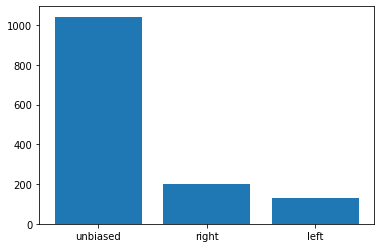

In [22]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(('unbiased','right','left'),[1042, 198, 131])
plt.show()

In [23]:
df['content'][0]

"an army officer and four other personnel were killed in action during an encounter between security forces and terrorists in jammu and kashmir's poonch district on monday, officials said. an anti-insurgency operation was launched in a village close to dera ki gali in surankote in the early hours following intelligence inputs about the presence of heavily-armed terrorists there, they said. the hiding terrorists fired on the search parties resulting in fierce gunfight and critical injuries to a junior commissioned officer or jco and four other soldiers. they died from their injuries. the encounter with the terrorists was going on and further details are awaited, a defence spokesperson said. officials said there were reports about the presence of a group of heavily-armed terrorists in the chamrer forest, after they managed to sneak from across the line of control (loc). reinforcements have been rushed to the area to plug all escape routes of the terrorists, they said. (with inputs from p

In [24]:
df['content'][2]


"a day after resigning from the national conference, devender rana, the former head of its jammu division, along with another party leader surjit singh slathia joined the bjp on monday. mr rana and mr slathia joined the bjp at its headquarters in new delhi in the presence of union ministers dharmendra pradhan, hardeep singh puri and jitendra singh. mr rana, who is a former mla and the younger brother of union minister jitendra singh, has also served as a political advisor to former jammu and kashmir chief minister and national conference (nc) leader omar abdullah. bjp general secretary in-charge for jammu and kashmir tarun chugh and its jammu and kashmir unit chief ravinder raina welcomed them in the party. mr rana has been advocating for the jammu declaration - a joint declaration of several political, social and business organisations, primarily demanding restoration of statehood for the jammu region and not for the whole jammu and kashmir. in 2019, the centre had revoked the erstwhi

In [25]:
df['content_lower']=df['content'].str.lower()
df['content_lower']=df['content_lower'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [26]:
unbiased_with_bias_words = df.loc[df['content_lower'].str.contains('shiv sena|shivsena|aap|bjp|congress', case=False)]

In [27]:
unbiased_with_bias_words = unbiased_with_bias_words.loc[unbiased_with_bias_words['bias']==3]


In [28]:
unbiased_with_bias_words

,text,retweet_count,favorite_count,bias,title,content,content_lower
4,RT @ndtvfeed: A Look At Inspiring Messages On ...,3,0,3,International Day Of The Girl Child 2021: Lead...,various world leaders and un agencies posted w...,various world leaders and un agencies posted w...
42,RT @ndtvfeed: Centre Cares About Optics Rather...,7,0,3,"""Under Guise Of Coal Shortage..."": Congress Le...",congress leader gourav vallabh on sunday alleg...,congress leader gourav vallabh on sunday alleg...
57,Blackout Warning For Delhi If Coal Supply Not ...,20,163,3,Blackout Warning For Delhi If Coal Supply Not ...,there could be a blackout in the national capi...,there could be a blackout in the national capi...
74,RT @ndtvfeed: Key Accused In Rajasthan Teacher...,3,0,3,Key Accused In Rajasthan Teachers' Recruitment...,the alleged mastermind behind the rajasthan el...,the alleged mastermind behind the rajasthan el...
83,Will Raise Move To Evict Shillong Sikhs With C...,7,61,3,Will Raise With Centre Move To Evict Shillong ...,punjab deputy chief minister sukhjinder singh ...,punjab deputy chief minister sukhjinder singh ...
...,...,...,...,...,...,...,...
1332,"RT @ndtvfeed: Maoist Activity In Jharkhand, Lo...",5,0,3,"Rise In Maoist Activities In Jharkhand, Loot O...",union minister for heavy industries mahendra n...,union minister for heavy industries mahendra n...
1333,"In #Haryana, Cops Fire Water Cannons At Protes...",11,68,3,Water Cannons Used As Protesting Farmers Clash...,farmers and security personnel clashed yet aga...,farmers and security personnel clashed yet aga...
1335,"Video: In Haryana, Cops Fire Water Cannons At ...",8,48,3,Water Cannons Used As Protesting Farmers Clash...,farmers and security personnel clashed yet aga...,farmers and security personnel clashed yet aga...
1336,RT @ndtvfeed: Extortion Racket Link Behind UP ...,9,0,3,Extortion Racket Link Behind UP Businessman Ki...,samajwadi party national president akhilesh ya...,samajwadi party national president akhilesh ya...


In [29]:
##bias=left 0 right 1 unbiased 3
unbiased = df.loc[df['bias']==3]
right = df.loc[df['bias']==1]
left = df.loc[df['bias']==0]

In [30]:
unbiased.head()

,text,retweet_count,favorite_count,bias,title,content,content_lower
0,"Army Officer, 4 Others Killed In Encounter In ...",9,63,3,"Army Officer, 4 Personnel Killed In Encounter ...",an army officer and four other personnel were ...,an army officer and four other personnel were ...
1,"#AryanKhan Case: No Bail For Him Today, Next H...",5,44,3,"Aryan Khan Case: No Bail For Him Today, Next H...",aryan khan did not get bail today for the thir...,aryan khan did not get bail today for the thir...
4,RT @ndtvfeed: A Look At Inspiring Messages On ...,3,0,3,International Day Of The Girl Child 2021: Lead...,various world leaders and un agencies posted w...,various world leaders and un agencies posted w...
6,RT @ndtvfeed: No Further Action In US Sexual A...,2,0,3,No Further Action In US Sexual Assault Case On...,british police said on monday they would be ta...,british police said on monday they would be ta...
8,RT @ndtvfeed: Woman Gang-Raped In Mumbai-Bound...,8,0,3,Woman Gang-Raped In Mumbai-Bound Train: All 8 ...,the government railway police have arrested al...,the government railway police have arrested al...


In [31]:
right.head()

,text,retweet_count,favorite_count,bias,title,content,content_lower
2,RT @ndtvfeed: Ex-National Conference Leaders D...,2,0,1,"Ex-National Conference Leaders Devender Rana, ...",a day after resigning from the national confer...,a day after resigning from the national confer...
5,RT @ndtvfeed: India Never Had More Decisive Go...,2,0,1,India Never Had More Decisive Government: PM M...,modi modi today launched indian space associat...,modi modi today launched indian space associat...
7,India Never Had More Decisive Government: PM A...,7,27,1,India Never Had More Decisive Government: PM M...,modi modi today launched indian space associat...,modi modi today launched indian space associat...
18,RT @ndtvfeed: Over 58 Crore Samples Tested For...,4,0,1,Over 58 Crore Samples Tested For COVID-19 In I...,the testing capacity has been ramped up extens...,the testing capacity has been ramped up extens...
22,"RT @ndtvfeed: ""How Do Conversions happen?...Th...",3,0,1,"""How Do Conversions Happen?...Those Doing It A...",rashtriya swayamsevak sangh (rss) chief mohan ...,rashtriya swayamsevak sangh rss chief mohan bh...


In [32]:
left.head()

,text,retweet_count,favorite_count,bias,title,content,content_lower
3,"RT @ndtvfeed: US Has Lost AI Battle To China, ...",5,0,0,"US Has Lost AI Battle To China, Pentagon's Ex-...",china has won the artificial intelligence batt...,china has won the artificial intelligence batt...
14,"Karnataka Minister's Bizarre Remarks On ""Moder...",13,71,0,"Karnataka Minister's Bizarre Remarks On ""Moder...",karnataka health minister dr k sudhakar on sun...,karnataka health minister dr k sudhakar on sun...
15,Agitation Will Continue Till Demands Are Met: ...,23,257,0,Agitation Will Continue Till Demands Are Met: ...,the farmers' agitation will continue till all ...,the farmers agitation will continue till all d...
27,"Petrol, Diesel Prices Hit New Highs https://t....",17,119,0,"Petrol, Diesel Prices Hit New Highs. Check Lat...","petrol, diesel price today: petrol prices touc...",petrol diesel price today petrol prices touche...
34,#MaharashtraBandh Today In Solidarity With Far...,21,78,0,Maharashtra Bandh Live Updates: Bus Services A...,bus services were affected across maharashtra ...,bus services were affected across maharashtra ...


In [33]:
%matplotlib inline

import requests
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
from textblob import TextBlob
import collections
from sklearn.manifold import TSNE

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


removing stopwords

In [34]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')+['shiv sena','shivsena','aap','bjp','congress']
print(stop_words)
df['clean_content'] = df['content_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

tokenization function

In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
# Tokenizing sentences
#sentences = nltk.sent_tokenize(paragraph)
# Tokenizing words
#words = nltk.word_tokenize(paragraph)

In [37]:
df2=df

In [38]:
df2['tokenized_content']=df.apply(lambda row: nltk.word_tokenize(row['clean_content']), axis=1)

In [39]:
df2.head()

,text,retweet_count,favorite_count,bias,title,content,content_lower,clean_content,tokenized_content
0,"Army Officer, 4 Others Killed In Encounter In ...",9,63,3,"Army Officer, 4 Personnel Killed In Encounter ...",an army officer and four other personnel were ...,an army officer and four other personnel were ...,army officer four personnel killed action enco...,"[army, officer, four, personnel, killed, actio..."
1,"#AryanKhan Case: No Bail For Him Today, Next H...",5,44,3,"Aryan Khan Case: No Bail For Him Today, Next H...",aryan khan did not get bail today for the thir...,aryan khan did not get bail today for the thir...,aryan khan get bail today third time since arr...,"[aryan, khan, get, bail, today, third, time, s..."
2,RT @ndtvfeed: Ex-National Conference Leaders D...,2,0,1,"Ex-National Conference Leaders Devender Rana, ...",a day after resigning from the national confer...,a day after resigning from the national confer...,day resigning national conference devender ran...,"[day, resigning, national, conference, devende..."
3,"RT @ndtvfeed: US Has Lost AI Battle To China, ...",5,0,0,"US Has Lost AI Battle To China, Pentagon's Ex-...",china has won the artificial intelligence batt...,china has won the artificial intelligence batt...,china artificial intelligence battle united st...,"[china, artificial, intelligence, battle, unit..."
4,RT @ndtvfeed: A Look At Inspiring Messages On ...,3,0,3,International Day Of The Girl Child 2021: Lead...,various world leaders and un agencies posted w...,various world leaders and un agencies posted w...,various world leaders un agencies posted wishe...,"[various, world, leaders, un, agencies, posted..."


In [40]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df2['text_lemmatized'] = df.clean_content.apply(lemmatize_text)


In [41]:
lemmatize_text('feet')

['foot']

In [42]:
df2.head()

,text,retweet_count,favorite_count,bias,title,content,content_lower,clean_content,tokenized_content,text_lemmatized
0,"Army Officer, 4 Others Killed In Encounter In ...",9,63,3,"Army Officer, 4 Personnel Killed In Encounter ...",an army officer and four other personnel were ...,an army officer and four other personnel were ...,army officer four personnel killed action enco...,"[army, officer, four, personnel, killed, actio...","[army, officer, four, personnel, killed, actio..."
1,"#AryanKhan Case: No Bail For Him Today, Next H...",5,44,3,"Aryan Khan Case: No Bail For Him Today, Next H...",aryan khan did not get bail today for the thir...,aryan khan did not get bail today for the thir...,aryan khan get bail today third time since arr...,"[aryan, khan, get, bail, today, third, time, s...","[aryan, khan, get, bail, today, third, time, s..."
2,RT @ndtvfeed: Ex-National Conference Leaders D...,2,0,1,"Ex-National Conference Leaders Devender Rana, ...",a day after resigning from the national confer...,a day after resigning from the national confer...,day resigning national conference devender ran...,"[day, resigning, national, conference, devende...","[day, resigning, national, conference, devende..."
3,"RT @ndtvfeed: US Has Lost AI Battle To China, ...",5,0,0,"US Has Lost AI Battle To China, Pentagon's Ex-...",china has won the artificial intelligence batt...,china has won the artificial intelligence batt...,china artificial intelligence battle united st...,"[china, artificial, intelligence, battle, unit...","[china, artificial, intelligence, battle, unit..."
4,RT @ndtvfeed: A Look At Inspiring Messages On ...,3,0,3,International Day Of The Girl Child 2021: Lead...,various world leaders and un agencies posted w...,various world leaders and un agencies posted w...,various world leaders un agencies posted wishe...,"[various, world, leaders, un, agencies, posted...","[various, world, leader, un, agency, posted, w..."


In [43]:
##TESTING
x=set(df2['tokenized_content'][0])
y=set(df2['text_lemmatized'][0])
print(x.intersection(y))
print(f'x length{len(x)}')
print(f'y length{len(y)}')
print(f'xintery length{len(x.intersection(y))}')



{'defence', 'jammu', 'hiding', 'fired', 'security', 'across', 'action', 'said', 'area', 'forest', 'died', 'pti', 'resulting', 'following', 'escape', 'control', 'intelligence', 'heavilyarmed', 'poonch', 'junior', 'army', 'sneak', 'antiinsurgency', 'close', 'village', 'awaited', 'encounter', 'monday', 'four', 'search', 'killed', 'gali', 'officer', 'operation', 'presence', 'district', 'critical', 'commissioned', 'personnel', 'jco', 'plug', 'managed', 'launched', 'early', 'spokesperson', 'going', 'group', 'ki', 'loc', 'dera', 'fierce', 'gunfight', 'surankote', 'rushed', 'chamrer', 'line'}
x length69
y length69
xintery length56


In [44]:
##TESTING
x-x.intersection(y)

{'details',
 'forces',
 'hours',
 'injuries',
 'inputs',
 'kashmirs',
 'officials',
 'parties',
 'reinforcements',
 'reports',
 'routes',
 'soldiers',
 'terrorists'}

In [45]:
#df2['text_lemmatized'][0]

In [46]:
#df2['tokenized_content'][0]